In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)
#library(DESeq2)

In [3]:
cadaver_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_nt.rds")
cadaver = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver.rds")
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


In [10]:
cadaver_nt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2204 taxa and 264 samples ]
sample_data() Sample Data:       [ 264 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 2204 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2204 tips and 2202 internal nodes ]

In [11]:
cadaver_5krare = rarefy_even_depth(cadaver_nt, sample.size = 5000,
                                  replace = FALSE, trimOTUs = TRUE, verbose = TRUE)
cadaver_5krare

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`

...
101 samples removedbecause they contained fewer reads than `sample.size`.
Up to first five removed samples are: 

Case85SpleenCase51LiverCase76BrainCase91SpleenCase69Brain	
...
349OTUs were removed because they are no longer 
present in any sample after random subsampling

...


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1855 taxa and 163 samples ]
sample_data() Sample Data:       [ 163 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 1855 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1855 tips and 1853 internal nodes ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


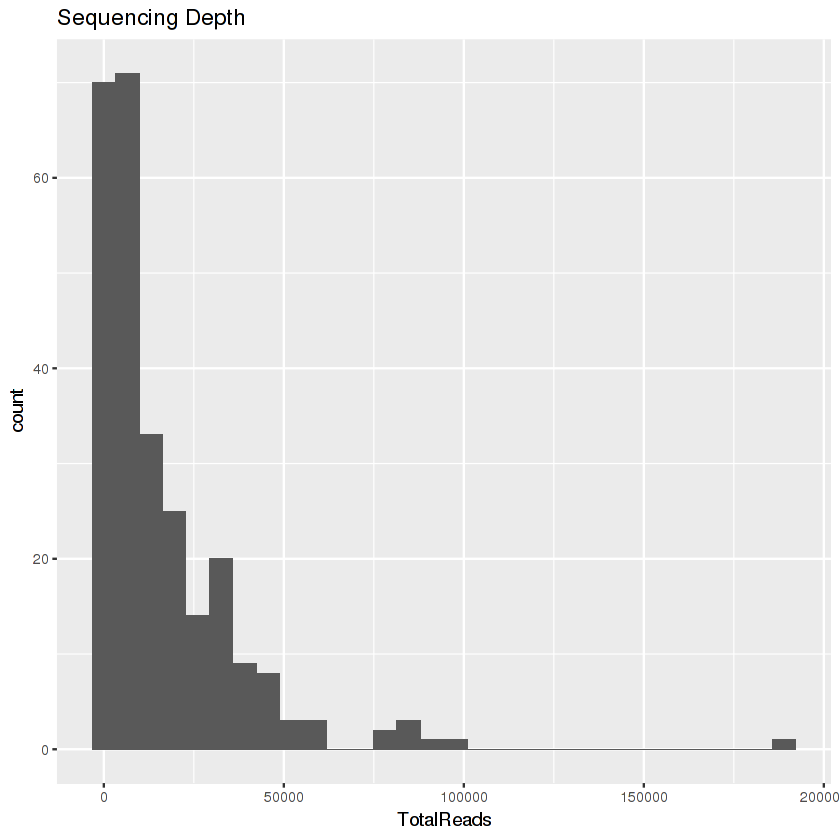

In [5]:
#raw data (non-rarefied)

cadaver_sdt = data.table(as(sample_data(cadaver_nt), "data.frame"),
                 TotalReads = sample_sums(cadaver_nt), keep.rownames = TRUE)
setnames(cadaver_sdt, "rn", "SampleName")
pSeqDepth = ggplot(cadaver_sdt, aes(TotalReads)) + geom_histogram() + ggtitle("Sequencing Depth")
pSeqDepth

### Sequencing summary

In [9]:
cadaver.summary = cadaver_sdt %>%
    #group_by(SampleType) %>%
summarise(count = sum(TotalReads),
              avg = mean(TotalReads), 
              sd = sd(TotalReads), 
              sem = sd/sqrt(length(TotalReads))) #%>%
    #arrange((SampleType))
cadaver.summary[complete.cases(cadaver.summary),]

organ.summary = cadaver_sdt %>%
    group_by(Organ) %>%
summarise(count = sum(TotalReads),
              avg = mean(TotalReads), 
              sd = sd(TotalReads), 
              sem = sd/sqrt(length(TotalReads))) %>%
    arrange((Organ))
organ.summary[complete.cases(organ.summary),]

count,avg,sd,sem
4337301,16429.17,20805.64,1280.499


Organ,count,avg,sd,sem
Blood,104148,14878.286,6470.989,2445.804
Brain,337643,7673.705,7482.472,1128.025
Heart,370621,9265.525,9298.874,1470.281
Liver,2903555,28189.854,27936.037,2752.619
Prostate,166289,7918.524,5471.205,1193.915
Spleen,382888,10635.778,9911.347,1651.891
Uterus,72157,5550.538,4266.424,1183.293


In [15]:
blood = subset_samples(cadaver_5krare, Organ=="Blood")
blood = prune_taxa(taxa_sums(blood)>0, blood)
brain = subset_samples(cadaver_5krare, Organ=="Brain")
brain = prune_taxa(taxa_sums(brain)>0, brain)
heart = subset_samples(cadaver_5krare, Organ=="Heart")
heart = prune_taxa(taxa_sums(heart)>0, heart)
liver = subset_samples(cadaver_5krare, Organ=="Liver")
liver = prune_taxa(taxa_sums(liver)>0, liver)
prostate = subset_samples(cadaver_5krare, Organ=="Prostate")
prostate = prune_taxa(taxa_sums(prostate)>0, prostate)
spleen = subset_samples(cadaver_5krare, Organ=="Spleen")
spleen = prune_taxa(taxa_sums(spleen)>0, spleen)
uterus = subset_samples(cadaver_5krare, Organ=="Uterus")
uterus = prune_taxa(taxa_sums(uterus)>0, uterus)

blood
brain
heart
liver
prostate
spleen
uterus


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 239 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 239 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 239 tips and 237 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 548 taxa and 19 samples ]
sample_data() Sample Data:       [ 19 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 548 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 548 tips and 546 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 433 taxa and 20 samples ]
sample_data() Sample Data:       [ 20 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 433 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 433 tips and 431 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1413 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 1413 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1413 tips and 1411 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 579 taxa and 13 samples ]
sample_data() Sample Data:       [ 13 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 579 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 579 tips and 577 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 451 taxa and 20 samples ]
sample_data() Sample Data:       [ 20 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 451 tips and 449 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 321 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 321 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 321 tips and 319 internal nodes ]

#### Sampling details

In [42]:
sampling = sample_data(cadaver)
colnames(sampling)

[1] "X.SampleID"           "BarcodeSequence"      "LinkerPrimerSequence"
 [4] "RTL_run"              "Case_no"              "Sex"                 
 [7] "Age"                  "Ethnicity"            "Order"               
[10] "Location"             "PMI"                  "Organ"               
[13] "RTLID"                "Samplename"           "Cause_of_death"      
[16] "The_manner_of_death"  "Height_cm"            "Weight_kg"           
[19] "bmi"                  "bmi_category"         "Description"

In [52]:
summary = sampling %>%
group_by(Location) %>%
    summarise(avg = mean(PMI), 
              sd = sd(PMI), 
              sem = sd/sqrt(length(PMI)),
              min = min(PMI),
              max = max(PMI))
summary

summary2 = sampling %>%
    group_by(Location) %>%
    count(The_manner_of_death)
summary2

summary3 = sampling %>%
    group_by(Location) %>%
    count(Organ)
summary3

Location,avg,sd,sem,min,max
Finland,108.0000,42.29222,9.456827,48.0,192
Italy,112.0380,96.36461,7.666357,24.0,432
USA,37.8314,47.75948,5.150038,3.5,240


Location,The_manner_of_death,n
Finland,Accident,6
Finland,Natural,12
Finland,Suicide,2
Italy,Accident,24
Italy,Accident_road traffic accident,6
Italy,Accident_Road traffic accident,17
Italy,Accident_Work related accident,4
Italy,Homicide,13
Italy,Natural death,63
Italy,Suicide,31


Location,Organ,n
Finland,Liver,20
Italy,Brain,35
Italy,Heart,29
Italy,Liver,36
Italy,Prostate,21
Italy,Spleen,24
Italy,Uterus,13
USA,Blood,7
USA,Brain,9
USA,Heart,11
